<a href="https://colab.research.google.com/github/st3llaa/cogs9-bitcoin/blob/main/cogs9_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- 1. Data Wrangling ---

# Load CPI data
cpi_df = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_391720.csv', skiprows=4) # Adjust skiprows if needed

# Filter for United States
us_cpi_df = cpi_df[cpi_df['Country Code'] == 'USA'].copy()

# Melt the data to have years as a column
us_cpi_df = us_cpi_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                          var_name='Year', value_name='Inflation Rate')

# Convert 'Year' to numeric and drop rows with non-numeric years
us_cpi_df['Year'] = pd.to_numeric(us_cpi_df['Year'], errors='coerce')
us_cpi_df.dropna(subset=['Year'], inplace=True)
us_cpi_df['Year'] = us_cpi_df['Year'].astype(int)

# Select relevant columns
us_cpi_df = us_cpi_df[['Year', 'Inflation Rate']]

# Load Bitcoin data
bitcoin_df = pd.read_csv('btcusd_1-min_data.csv')

# Convert timestamp to datetime
bitcoin_df['Timestamp'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s')

# Set timestamp as index
bitcoin_df.set_index('Timestamp', inplace=True)

# Resample to annual frequency and get the mean close price
annual_bitcoin_price = bitcoin_df['Close'].resample('Y').mean()
annual_bitcoin_price = annual_bitcoin_price.reset_index()
annual_bitcoin_price['Year'] = annual_bitcoin_price['Timestamp'].dt.year
annual_bitcoin_price.rename(columns={'Close': 'Avg_Bitcoin_Price'}, inplace=True)
annual_bitcoin_price = annual_bitcoin_price[['Year', 'Avg_Bitcoin_Price']]

# --- Display Data Tables ---

print("First 5 rows of Processed US CPI Data:")
display(us_cpi_df)

print("\nFirst 5 rows of Annual Average Bitcoin Price Data:")
display(annual_bitcoin_price)

<ipython-input-2-cbd75b716745>:31: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_bitcoin_price = bitcoin_df['Close'].resample('Y').mean()


First 5 rows of Processed US CPI Data:


,Year,Inflation Rate
0,1960,1.457976
1,1961,1.070724
2,1962,1.198773
3,1963,1.239669
4,1964,1.278912
...,...,...
60,2020,1.233584
61,2021,4.697859
62,2022,8.002800
63,2023,4.116338



First 5 rows of Annual Average Bitcoin Price Data:


,Year,Avg_Bitcoin_Price
0,2012,8.234715
1,2013,187.034192
2,2014,525.773139
3,2015,272.191506
4,2016,565.557293
5,2017,3941.622657
6,2018,7530.371791
7,2019,7350.824878
8,2020,11062.736906
9,2021,47376.462393


Correlation between annual US inflation and average annual Bitcoin price: 0.57

Descriptive Statistics for Merged Data:


,Year,Inflation Rate,Avg_Bitcoin_Price
count,13.00000,13.000000,13.000000
mean,2018.00000,2.609355,15519.084121
std,3.89444,2.025251,21076.959558
min,2012.00000,0.118627,8.234715
25%,2015.00000,1.464833,525.773139
50%,2018.00000,2.069337,7350.824878
75%,2021.00000,2.949525,28243.542735
max,2024.00000,8.002800,65885.129542


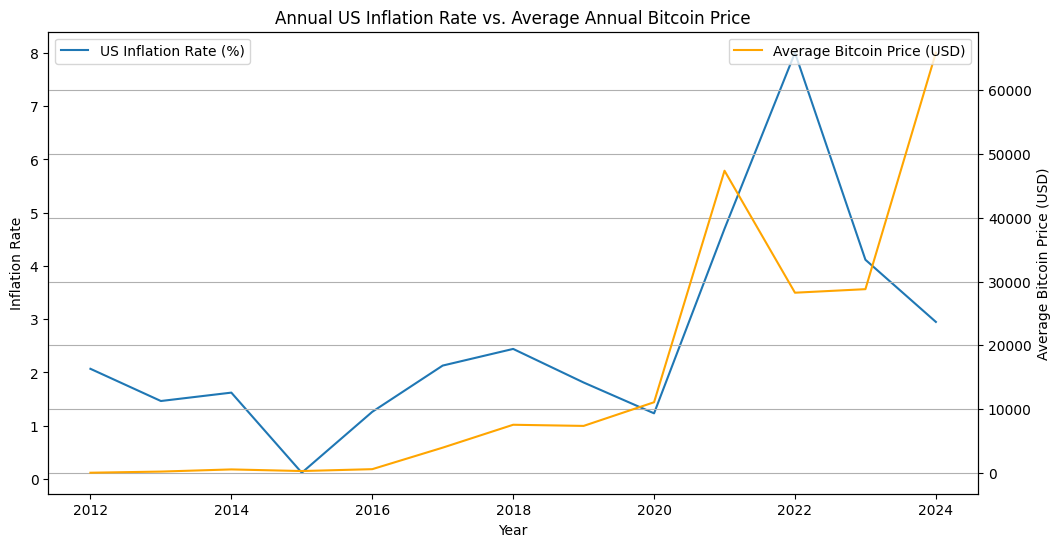

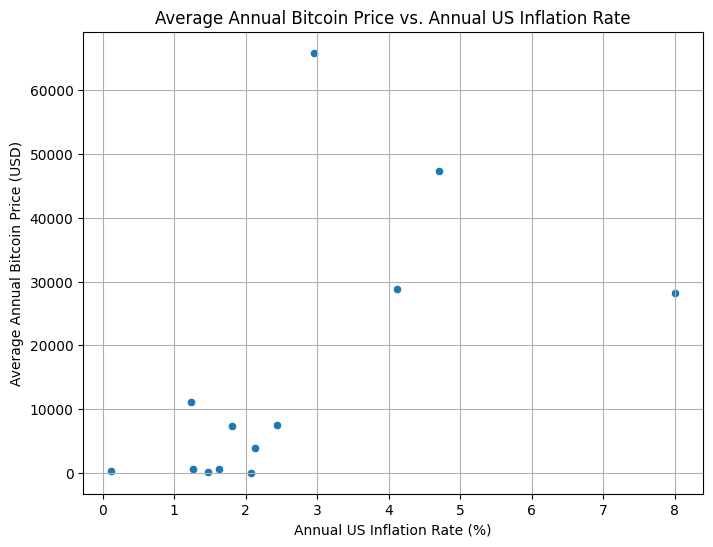

In [ ]:
# --- 2. Data Analysis ---

# Merge the dataframes
merged_df = pd.merge(us_cpi_df, annual_bitcoin_price, on='Year')

# Calculate correlation
correlation = merged_df['Inflation Rate'].corr(merged_df['Avg_Bitcoin_Price'])
print(f'Correlation between annual US inflation and average annual Bitcoin price: {correlation:.2f}')

# --- 3. Data Visualization ---

print("\nDescriptive Statistics for Merged Data:")
display(merged_df.describe())

# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Year', y='Inflation Rate', label='US Inflation Rate (%)')
ax2 = plt.twinx()
sns.lineplot(data=merged_df, x='Year', y='Avg_Bitcoin_Price', ax=ax2, color='orange', label='Average Bitcoin Price (USD)')
plt.title('Annual US Inflation Rate vs. Average Annual Bitcoin Price')
plt.xlabel('Year')
ax2.set_ylabel('Average Bitcoin Price (USD)')
plt.grid(True)
plt.legend(loc='upper left') # Add legend for the second y-axis
ax2.legend(loc='upper right') # Add legend for the first y-axis
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Inflation Rate', y='Avg_Bitcoin_Price')
plt.title('Average Annual Bitcoin Price vs. Annual US Inflation Rate')
plt.xlabel('Annual US Inflation Rate (%)')
plt.ylabel('Average Annual Bitcoin Price (USD)')
plt.grid(True)
plt.show()